<a href="https://colab.research.google.com/github/VitktorS/repository_for_colab/blob/main/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 511.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fe27bb0757a5417d62ebc882a8ae9542a00f49f346db417d06564682e3b13d63
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from time import sleep
from tqdm.notebook import tqdm
from time import sleep
from collections import Counter
import collections
import re
import numpy as np
from operator import itemgetter
import re
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer#векторизация
from sklearn.metrics.pairwise import cosine_similarity#показывает подобие через обратное векторное расстояние
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt

In [ ]:
# one-page parsing

url ='https://irecommend.ru/catalog/list/939-98700-1190748'
response = requests.get(url)
sleep(1)
soup = bs(response.text, 'html.parser')

texts = []
naming = []
text = soup.find_all('div', class_ = 'extract')


for t in text:
    texts.append(t.text)


texts_2 = [line.strip() for line in texts]
df = pd.DataFrame(texts_2)
df.to_excel('feedback_dodo_2.xlsx')
df

""


In [ ]:
#parsing with page changing

page =1
while True:
  url = 'https://irecommend.ru/catalog/list/939-98700-1190748?page='+str(page)
  response = requests.get(url)
  sleep(1)
  soup = bs(response.text, 'html.parser')
  texts=[]
  text = soup.find_all('div', class_ = 'extract')
  for t in text:
    texts.append(t.text)
  if len(texts):
    page+=1
  else:
    break
df = pd.DataFrame(texts,columns = ['текст'])
df.to_excel('feedback_dodo_2_1.xlsx')
df


,текст


In [ ]:
#парсинг отзывов с сайта тинькофф (в читаемой кодировке)

url ='https://www.tinkoff.ru/reviews/company/dodo-pitstsa/13920/'

r = requests.get(url)
soup = bs(response.content, "html.parser")

texts = []

text = soup.find_all('div', class_='clyW3E')

for t in text:
  texts.append(t.text)
texts_2 = [line.strip() for line in texts]
texts_3 = [text.replace('\n', '') for text in texts_2]
df = pd.DataFrame(texts_3)
df.to_excel('feedback_dodo_3.xlsx')
df



""


In [ ]:
#парсинг отзывов из обсуждений группы вк


url = 'https://api.vk.com/method/'

ID = 214314690 #id сообщества
ID_2 = 50067624 #id обусждения


method = 'board.getComments'


params = {'group_id':ID,
          'topic_id': ID_2,
'access_token':'vk1.a.fU0ooKsnOaAUVrqe83htTV6vAssTLEBOYAHu_96jKEKbV9qhv5G_BslK6vqt_48fYoCcT8XNRBz4ZH-Y8v7Xm-b6GwvzBVCYYcgplb_PRK9Bd2agKL3lDkWmEjP8lMTDrG6ujr8vzkRdUfvX4AFob9h8lpJXFkUWK3N_7uBQeGPgLH-nxo1hrX58LzH2QKo14PqGkAGTA0UGYsjv5a_p1w',
'v': '5.199',
'offset':0}

items = []
texts = []
for of in tqdm(range(0,2000,100)):
  params['offset'] = of
  inf = requests.get(url + method, params = params).json()
  items.extend(inf['response']['items'])
  for t in inf['response']['items']:
    texts.append(t['text'])
  sleep(0.2)

texts_new = list(dict.fromkeys(texts))
texts_new = [text.replace('\n', '') for text in texts_new]
df = pd.DataFrame(texts_new)
df.to_excel('feedback_svtgrd_vk_3.xlsx')
df

  0%|          | 0/20 [00:00<?, ?it/s]

,0
0,"Уважаемые жильцы, ждем ваших отзывов и пожеланий!"
1,Хочу поделиться восторженным впечатлением от с...
2,Отличная управляющая компания! Обслуживание ка...
3,По моему мнению это лучшая компания в нашем го...
4,Хорошая Управляющая компания !!! Заявки выполн...
5,Достойная управляющая компания с грамотными сп...
6,"С поставленой задачей справляются, всегда даю..."
7,"Адекватный руководитель, наверно у нас в город..."
8,"[club214314690:bp-214314690_8|Управляющая], а ..."


In [ ]:
#квантификация текстов
df = pd.read_excel('feedback_svtgrd_vk_new.xlsx')
texts = list(df['текст'])
texts

['10.1 заселение Уважаемые новоселы для Вашего удобства публикуем порядок действий для получения ключей:1. Записаться по телефону 305-36-36 , 305-36-25, 305-36-10Согласовать дату и  время осмотра квартиры 2. После записи, за час до назначенного времени, необходимо обратится в Управляющую Компанию - ООО «УК «Святоград» тел для связи +7 (952) 381-57-57 для получения смотрового листа и осмотра квартиры. 4. После осмотра квартиры можно подписывать АПП 5. Предоставляете АПП в управляющую компанию и получаете ключи',
 'Как подписывать, если ГВС нет, лифты не включены???',
 'А что собрания по выбору УК не будет???',
 '[id10251120:bp-214068014_22|Ирина], Здравствуйте, благодарим Вас за обращение. На все возникшие у Вас вопросы, будем рады ответить в день Вашего визита со смотровым листом.',
 '[club214068014:bp-214068014_26|ООО "УК "СВЯТОГРАД"], я уже была, но никто не ответил мне- не знают??!!!!! А сейчас вы мне не можете ответить про собрание??? Горячую воду??? И МУСОР строительный везде ?!!'

In [ ]:
texts_normal_1=[]
for text in texts:
  try:
    texts_normal_1.append(nltk.word_tokenize(text))
  except:
    texts_normal_1.append('-')
texts_normal_1

[['10.1',
  'заселение',
  'Уважаемые',
  'новоселы',
  'для',
  'Вашего',
  'удобства',
  'публикуем',
  'порядок',
  'действий',
  'для',
  'получения',
  'ключей:1',
  '.',
  'Записаться',
  'по',
  'телефону',
  '305-36-36',
  ',',
  '305-36-25',
  ',',
  '305-36-10Согласовать',
  'дату',
  'и',
  'время',
  'осмотра',
  'квартиры',
  '2',
  '.',
  'После',
  'записи',
  ',',
  'за',
  'час',
  'до',
  'назначенного',
  'времени',
  ',',
  'необходимо',
  'обратится',
  'в',
  'Управляющую',
  'Компанию',
  '-',
  'ООО',
  '«',
  'УК',
  '«',
  'Святоград',
  '»',
  'тел',
  'для',
  'связи',
  '+7',
  '(',
  '952',
  ')',
  '381-57-57',
  'для',
  'получения',
  'смотрового',
  'листа',
  'и',
  'осмотра',
  'квартиры',
  '.',
  '4',
  '.',
  'После',
  'осмотра',
  'квартиры',
  'можно',
  'подписывать',
  'АПП',
  '5',
  '.',
  'Предоставляете',
  'АПП',
  'в',
  'управляющую',
  'компанию',
  'и',
  'получаете',
  'ключи'],
 ['Как',
  'подписывать',
  ',',
  'если',
  'ГВС',
  

In [ ]:
morph = pymorphy2.MorphAnalyzer()

pos_list = ['NOUN', 'ADJF', 'ADJS', 'VERB', 'INFN']


texts_normal_2 =[]
for text in texts_normal_1:
  post_tokens = []
  for token in text:
    token_morph = morph.parse(token)[0]
    if token_morph.tag.POS in pos_list:
      post_tokens.append(token_morph.normal_form)
  texts_normal_2.append(post_tokens)
texts_normal_2

[['заселение',
  'уважаемый',
  'новосёл',
  'ваш',
  'удобство',
  'публиковать',
  'порядок',
  'действие',
  'получение',
  'записаться',
  'телефон',
  '305-36-10согласовать',
  'дата',
  'время',
  'осмотр',
  'квартира',
  'запись',
  'час',
  'время',
  'обратиться',
  'компания',
  'ооо',
  'ук',
  'святограда',
  'тело',
  'связь',
  'получение',
  'смотровой',
  'лист',
  'осмотр',
  'квартира',
  'осмотр',
  'квартира',
  'подписывать',
  'предоставлять',
  'компания',
  'получать',
  'ключ'],
 ['подписывать', 'лифт'],
 ['собрание', 'выбор', 'ук', 'быть'],
 ['bp-214068014_22|ирин',
  'благодарить',
  'обращение',
  'вопрос',
  'быть',
  'рада',
  'ответить',
  'день',
  'ваш',
  'визит',
  'смотровой',
  'лист'],
 ['bp-214068014_26|ооо',
  'ук',
  'святограда',
  'быть',
  'ответить',
  'знать',
  'мочь',
  'ответить',
  'собрание',
  'горячий',
  'вода',
  'мусор',
  'строительный'],
 ['bp-214068014_27|ирин',
  'написать',
  'номер',
  'смотровой',
  'лист',
  'личный',
  '

In [ ]:
#удаляем ненужные токены

texts_normal_3 = []
for text in texts_normal_2:
    texts_normal_3.append([token for token in text if not re.search(r'id|214068014', token)])
texts_normal_3

[['заселение',
  'уважаемый',
  'новосёл',
  'ваш',
  'удобство',
  'публиковать',
  'порядок',
  'действие',
  'получение',
  'записаться',
  'телефон',
  '305-36-10согласовать',
  'дата',
  'время',
  'осмотр',
  'квартира',
  'запись',
  'час',
  'время',
  'обратиться',
  'компания',
  'ооо',
  'ук',
  'святограда',
  'тело',
  'связь',
  'получение',
  'смотровой',
  'лист',
  'осмотр',
  'квартира',
  'осмотр',
  'квартира',
  'подписывать',
  'предоставлять',
  'компания',
  'получать',
  'ключ'],
 ['подписывать', 'лифт'],
 ['собрание', 'выбор', 'ук', 'быть'],
 ['благодарить',
  'обращение',
  'вопрос',
  'быть',
  'рада',
  'ответить',
  'день',
  'ваш',
  'визит',
  'смотровой',
  'лист'],
 ['ук',
  'святограда',
  'быть',
  'ответить',
  'знать',
  'мочь',
  'ответить',
  'собрание',
  'горячий',
  'вода',
  'мусор',
  'строительный'],
 ['написать', 'номер', 'смотровой', 'лист', 'личный', 'сообщение', 'группа'],
 ['лифт', 'запустить', 'убрать', 'забор', 'хотеть', 'заехать', '

In [ ]:
#кластеры подписок пользователей

tfidf = TfidfVectorizer(max_features = 2500) #это число настраивается вручную



post_vectors =[]

for t in texts_normal_3:
  post_vectors.append(' '.join(t))

cluster_num = 12

x = tfidf.fit_transform(post_vectors).toarray()
#чем больше кластеров, чем больше итераций, тем больше времени займет обучение
lda = LatentDirichletAllocation(n_components = cluster_num, #число кластеров
                                learning_method = 'batch',#метод обучения модели
                                max_iter = 25, #количество итераций
                                random_state = 0)

document_topics = lda.fit_transform(x)


sorting = np.argsort(lda.components_, axis = 1)[:,::-1]
feature_names =np.array(list(dict(sorted(tfidf.vocabulary_.items(), key = itemgetter(1))).keys()))
cluster_tokens = []
for num in tqdm(range(0, cluster_num)):
  token_list = list(feature_names[list(sorting[num])])
  cluster_tokens.append(token_list)
df_cluster = pd.DataFrame(cluster_tokens).T

df_cluster.to_excel('кластеры_отзывов.xlsx')
df_cluster

  0%|          | 0/12 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,10,11
0,компания,вежливый,хотеть,запустить,ответить,лифт,выбор,компания,брак,один,вода,смотровой
1,адекватный,делаться,ждать,дом,февраль,подписывать,собрание,святограда,окно,смущать,приложение,лист
2,нормальный,мнение,жилец,отопление,тэс,свой,весь,связь,делать,настрчили,недоделка,день
3,альянс,мой,пожелание,наш,получить,компания,быть,подписывать,единственный,отзыв,рука,квартира
4,осмотр,специалист,отзыв,забор,отопление,друг,ук,уважаемый,компания,впечатление,лист,сообщение
...,...,...,...,...,...,...,...,...,...,...,...,...
216,офис,офис,дальпитерстрой,лиговский,лиговский,офис,офис,дальпитерстрой,офис,офис,дальпитерстрой,пожелание
217,дальпитерстрой,лиговский,офис,дальпитерстрой,дальпитерстрой,лиговский,лиговский,офис,лиговский,дальпитерстрой,офис,жилец
218,запустить,запустить,запустить,офис,запустить,запустить,запустить,запустить,запустить,лиговский,запустить,ждать
219,день,день,день,день,день,день,день,день,день,запустить,день,запустить


In [ ]:
clusters_norm_nums = [0,3,4,8,9] #выделенные кластеры вставляй сюда
list_size = len(clusters_norm_nums)
clusters_solution = []
for mark_list in tqdm(document_topics):
  clusters_solution.append(mark_list[clusters_norm_nums])#сортируем наши кластеры


y = [] #к какому кластеру принадлежит пост в большей степени
for mark_list in tqdm(clusters_solution):
  m = list(mark_list)
  y.append(m.index(max(m)))
#разделяем нашу выборку на тестовую и тренировочную
x_train, x_test, y_train, y_test =  train_test_split(x,y,
                                                     test_size = 0.2,
                                                     random_state = 0)
print(y)

classifier = RandomForestClassifier(n_estimators=100,
                                    random_state=0,
                                    max_depth = 5,#количество уровней
                                    max_features=5)#количество веток
#построение и проверка модели
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

scores = classifier.predict_proba(tfidf.transform(post_vectors).toarray())


# df_lists = []
# index = 0
# for t in scores:
#   df_lists = list(np.append(t, scores))
#   index +=1
# df_result = pd.DataFrame(df_lists)

df_res_1 = scores
# df_result.to_excel('Присутствие тематик в названиях.xlsx')
main_result = pd.DataFrame(df_res_1,columns = ['позитинвые отзывы', 'проблемы с отоплением', 'проблемы со счетами', 'окна с браком', 'накрученные отзывы'])
# main_result_2 = main_result['списки'].apply(pd.Series)
# df = pd.concat([main_result, main_result_2], axis=1).drop('списки', axis=1)
main_result


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

[0, 1, 2, 2, 2, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 2, 4, 4, 0, 0, 0, 2, 1, 0, 4]
0.0


,позитинвые отзывы,проблемы с отоплением,проблемы со счетами,окна с браком,накрученные отзывы
0,0.743051,0.118933,0.073970,0.038209,0.025837
1,0.181556,0.513683,0.158948,0.077325,0.068489
2,0.171625,0.389736,0.266516,0.093482,0.078641
3,0.185907,0.189244,0.524067,0.050746,0.050036
4,0.122123,0.247947,0.517630,0.059806,0.052494
5,0.291626,0.321649,0.245172,0.072881,0.068672
6,0.152781,0.581381,0.128292,0.066664,0.070882
7,0.186269,0.471919,0.166227,0.085694,0.089892
8,0.388043,0.296935,0.187731,0.066909,0.060382
9,0.119780,0.168958,0.087327,0.590455,0.033480


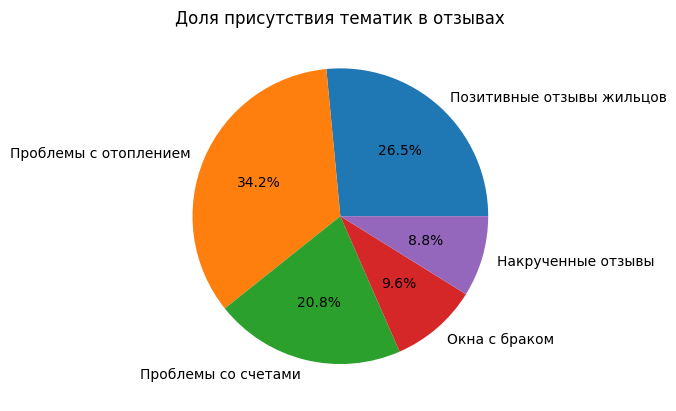

In [ ]:
#круговая диаграмма

cluster_means = np.mean(scores, axis=0)
clusters = ['Позитивные отзывы жильцов', 'Проблемы с отоплением', 'Проблемы со счетами', 'Окна с браком', 'Накрученные отзывы']

plt.pie(cluster_means, labels=clusters, autopct='%1.1f%%')


plt.title('Доля присутствия тематик в отзывах')


plt.show()

In [ ]:
#для анализа мешка слов
tokens = []
for token in texts_normal_2:
  for i in token:
    tokens.append(i)

BoW = dict(collections.Counter(tokens))
df_2 = pd.DataFrame(BoW.items()).to_excel('Мешок_слов.xlsx')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128110 (\N{POLICE OFFICER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


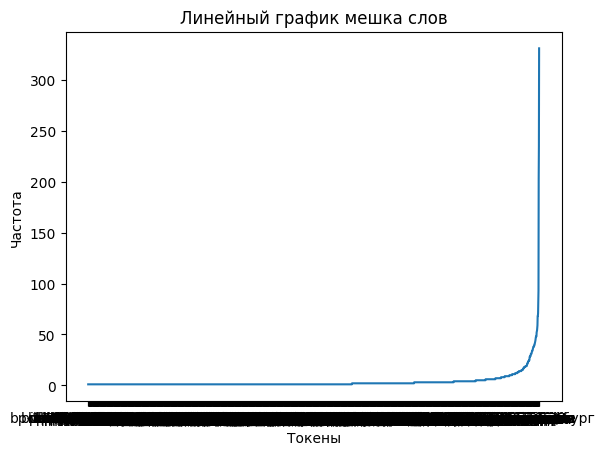

In [ ]:
sorted_BoW = dict(sorted(BoW.items(), key=lambda item: item[1]))
